In [1]:
import pandas as pd

In [2]:
Jobs = pd.read_csv("JobsFE.csv")

In [3]:
Jobs.columns

Index(['Job Id', 'workplace', 'working_mode', 'salary', 'position',
       'job_role_and_duties', 'requisite_skill', 'offer_details'],
      dtype='object')

In [4]:
print(Jobs.shape)
Jobs.head()

(10000, 8)


,Job Id,workplace,working_mode,salary,position,job_role_and_duties,requisite_skill,offer_details
0,1017340707950150,panama city panama,contract,69500.0,procurement manager,promote supplier diversity initiatives and inc...,supplier diversity programs diversity and incl...,transportation benefits professional developme...
1,2421048253959975,tunis tunisia,part-time,84500.0,architectural designer,prepare detailed architectural drawings and pl...,architectural drafting autocad 2d and 3d model...,employee assistance programs eap tuition reimb...
2,1822636506606589,harare zimbabwe,full-time,69500.0,art teacher,coordinate art education programs curriculum d...,art education curriculum program development t...,employee referral programs financial counselin...
3,3068000579894602,tirana albania,temporary,75500.0,environmental consultant,assess the environmental impact of projects an...,environmental impact analysis data collection ...,transportation benefits professional developme...
4,1747904829392680,city of baghdad iraq,temporary,90000.0,art teacher,coordinate art education programs curriculum d...,art education curriculum program development t...,employee referral programs financial counselin...


### Elbow Method to determine the optimal number of clusters


In [5]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


c:\Users\LAPSHOP\anaconda3\envs\my_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
Jobs["job_text"] = (
    Jobs["position"].astype(str) + " " +
    Jobs["job_role_and_duties"].astype(str) + " " +
    Jobs["requisite_skill"].astype(str)
)
Jobs["job_text"].head()

0    procurement manager promote supplier diversity...
1    architectural designer prepare detailed archit...
2    art teacher coordinate art education programs ...
3    environmental consultant assess the environmen...
4    art teacher coordinate art education programs ...
Name: job_text, dtype: object

In [7]:
Jobs.columns

Index(['Job Id', 'workplace', 'working_mode', 'salary', 'position',
       'job_role_and_duties', 'requisite_skill', 'offer_details', 'job_text'],
      dtype='object')

In [8]:
# Initialize SBERT model
MODEL = SentenceTransformer("paraphrase-MiniLM-L6-v2", device="cpu")

In [9]:
job_texts = Jobs["job_text"].tolist() 
job_texts

['procurement manager promote supplier diversity initiatives and inclusion identify and onboard diverse suppliers monitor compliance with diversity goals and regulations supplier diversity managerpromote diversity and inclusion in the supply chain manage supplier diversity programs and assess supplier performance supplier diversity programs diversity and inclusion initiatives supplier assessment and certification data collection and reporting vendor outreach and engagement strategic planning communication skills relationship building attention to diversity and inclusion principles 5 to 10 years bba',
 'architectural designer prepare detailed architectural drawings and plans using computeraided design cad software assist architects in project documentation and coordination ensure compliance with building codes and regulations architectural drafterarchitectural drafters assist architects and engineers in creating detailed technical drawings and plans for buildings and structures they use

In [10]:
len(job_texts)

10000

In [11]:
job_embeddings = MODEL.encode(job_texts, convert_to_numpy=True)

In [12]:
job_embeddings = job_embeddings / np.linalg.norm(job_embeddings, axis=1, keepdims=True)


In [13]:
# Elbow Method to determine the optimal number of clusters
def elbow_method(data, max_clusters):
    distortions = []
    K = range(1, max_clusters + 1)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)  # Inertia: Sum of squared distances to the nearest cluster center

    # Plot the elbow curve
    plt.figure(figsize=(8, 5))
    plt.plot(K, distortions, "bo-", markersize=8)
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Distortion (Inertia)")
    plt.title("Elbow Method for Optimal k")
    plt.show()


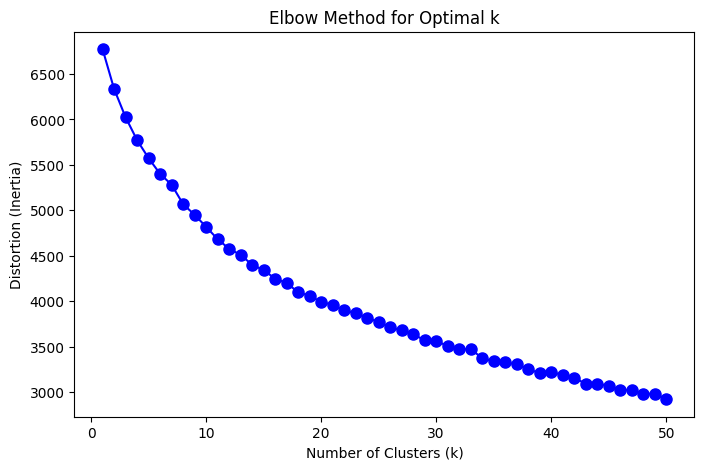

In [35]:
# Apply the Elbow Method
elbow_method(job_embeddings, max_clusters=50)

In [14]:
optimal_clusters = 6

#### Perform K-Means clustering with the optimal number of clusters


In [15]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(job_embeddings)

In [16]:
# Add the cluster labels as a new column to the dataset
Jobs["cluster"] = cluster_labels

In [17]:
Jobs.columns

Index(['Job Id', 'workplace', 'working_mode', 'salary', 'position',
       'job_role_and_duties', 'requisite_skill', 'offer_details', 'job_text',
       'cluster'],
      dtype='object')

In [18]:
# Save the updated dataset with cluster labels
Jobs.to_csv("Jobs_with_clusters.csv", index=False)

### Example resume text

In [19]:
resume_text = """Yomna Waleed Elsayed Ahmed Hassan
Junior machine learning engineering
yomnawaleed2002@gmail.com
EGYPT, AlGharbia goverment, tanta city.
Yomna Waleed
yomna_waleed
+201118064546
19/05/2002
YomnaWaleed
yomna_waleed
EDUCATION
Faculty of Engineering, Department of Computers and Control, Tanta university 2020 – 2025
Tanta, Egypt
TRAINING
Manara Tech 04/2023 – present
PROFILE
I am a dedicated engineering student specializing in Computer and Automatic Control, with a strong academic background and practical experience in
programming and software development. I excelled in my coursework, achieving an excellent degree in my second year and a very good grade in my
first year. I have a solid foundation in Python programming and libraries essential for data science and machine learning, including NumPy, pandas,
and Matplotlib. My participation in the International Collegiate Programming Contest (ICPC) as a team leader has further honed my problem-solving
skills.
I am actively expanding my expertise in machine learning (ML), particularly in Natural Language Processing (NLP) and Generative AI, having
completed supervised machine learning courses and gained practical experience with various deep learning architectures, including DNNs, RNNs, and
CNNs. My background also includes full-stack development using React.js and Node.js, enabling me to effectively integrate machine learning models
into web applications.
SKILLS
Programming Languages & Technologies:
•Python: Proficient
•C++: Proficient
•React.js: Competent
•Node.js: Amateur
•HTML/CSS: Competent
Data Structures & Algorithms
•Proficient in implementing algorithms and data structures in Python
and C++
•Strong foundation in problem-solving techniques, demonstrated
through participation in competitive programming
Machine Learning & Data Science:
•Libraries: NumPy, pandas, Matplotlib (Competent)
•Machine Learning: Supervised learning (regression, classification)
using Scikit-learn (Competent)
•Deep Learning: Familiar with TensorFlow and PyTorch (Amateur)
•Architectures: DNN, RNN, CNN, Object Detection, Word Detection,
Transfer Learning (Amateur)
•Generative AI: Currently learning (Amateur)
SOFT SKILLS
Project management and leadership
While I was working on the maze game project, I managed to divide the
tasks among the group, although this was challenging because we chose
a three-dimensional game that was beyond what we had learned.
Thinking outside the box
"While choosing a project, I always try to challenge myself and attempt
something that is difficult for others to implement, such as selecting a
three-dimensional game instead of a two-dimensional one, despite the
difficulty of it. I successfully completed the game."
PROJECTS
Email-SMS-Spam-Classifier, Developed a supervised machine learning model to classify emails and SMS messages as
spam or not using Python and Scikit-learn.
08/2024 – 08/2024
Egypt-House-Price-Prediction--Regression-Project, Built a regression model to predict house prices based on
various features, implemented with an HTML interface for user interaction.
08/2024 – 08/2024
Nonogram Puzzle, Created a Nonogram puzzle generator that utilizes backtracking methods and a CSP approach to
solve generated puzzles. My contribution was in developing the solver algorithm.
2024
3d maze game, Developed a 3D maze game using OpenGL and Python, where players navigate to collect coins and solve
puzzles. My role included building the player's movement mechanics and 3D interactions.
2023
Railway Ticket booking, Designed and implemented a train ticket booking system using Node.js, React.js, and MS SQL
for database management, allowing users to book and cancel tickets.
2023
simple memory gain, Created a memory game using React.js that challenges users to find pairs of matching images. 2023
CERTIFICATES
ICPC Qualification 2022
Problem Solving
Back-end enineering using Nodejs and Express
Ideal Student Recognition
ICPC qualification 2023
Zero to Hero in Front-end Development with React
Fullstack Engineering with React and Node.js
Volunteer Work at College and University
LANGUAGES
English
EF SET English Certificate
French"""

In [20]:
# Encode the resume text
resume_embedding = MODEL.encode([resume_text], convert_to_numpy=True)

In [21]:
# Predict the cluster of the resume
resume_cluster = kmeans.predict(resume_embedding)[0]
print(f"The resume belongs to cluster: {resume_cluster}")

The resume belongs to cluster: 0


#### Function to evaluate model results using clusters

In [22]:
def evaluate_model_results(recommended_jobs, resume_cluster):
    """
    Evaluates the model results by checking how many recommended jobs
    belong to the same cluster as the resume.
    """
    # Extract cluster labels of recommended jobs
    recommended_clusters = []
    for job in recommended_jobs:
        job_id = job["Job Id"]  # Ensure "Job Id" is the correct key
        cluster = Jobs.loc[Jobs["Job Id"] == job_id, "cluster"].values[0]
        recommended_clusters.append(cluster)

    # Calculate cluster purity
    cluster_purity = np.sum(np.array(recommended_clusters) == resume_cluster) / len(recommended_clusters)

    print(f"clusters of recommended Jobs is ", recommended_clusters)
    print(f"cluster of resume is {resume_cluster}")
    print(f"Percentage of recommended jobs in the same cluster: {cluster_purity:.2%}")
    return cluster_purity

### calculate the accuracy of SBERT model 

In [23]:
from SBERTmodel import JobRecommendationSystem as SBERTmodel

In [24]:
# Load the system with job data
import time
import json
start = time.time()
recommender_SBERT = SBERTmodel("Jobs_with_clusters.csv")
recommended_jobs_SBERT = recommender_SBERT.recommend_jobs(resume_text, top_n=50)
time_SBERT = time.time()- start
print(f" the Execution of SBERT model is {time_SBERT}")


Loaded job data with columns: Index(['Job Id', 'workplace', 'working_mode', 'salary', 'position',
       'job_role_and_duties', 'requisite_skill', 'offer_details', 'job_text',
       'cluster'],
      dtype='object')
 the Execution of SBERT model is 311.3094313144684


In [25]:
#call the evaluation metrics 
SBERT_cluster_Purity = evaluate_model_results(recommended_jobs_SBERT["recommended_jobs"], resume_cluster)
print(f"Cluster Purity: {SBERT_cluster_Purity:.2%}")

clusters of recommended Jobs is  [5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 5, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 0, 5, 5, 0, 0, 5, 5, 5, 5, 0, 0, 5, 0, 5, 0, 5, 0, 5, 5, 5, 5]
cluster of resume is 0
Percentage of recommended jobs in the same cluster: 60.00%
Cluster Purity: 60.00%


In [26]:
recommended_jobs_SBERT

{'recommended_jobs': [{'Job Id': 504684777682935,
   'workplace': 'cairo egypt',
   'working_mode': 'temporary',
   'salary': 93000.0,
   'position': 'data analyst',
   'job_role_and_duties': 'apply machine learning algorithms and statistical techniques to extract insights from large datasets develop predictive models conduct data experiments and ab testing data scientistdata scientists use their expertise in data analysis and machine learning to extract valuable insights and predictions from data they build and train models conduct statistical analysis and communicate findings to drive datadriven decisionmaking in the organization',
   'requisite_skill': 'machine learning algorithms and libraries eg scikitlearn tensorflow pytorch statistical analysis and modeling data preprocessing and cleaning big data technologies eg hadoop spark data visualization strong programming skills python r 0 to 10 years mcom',
   'offer_details': 'flexible spending accounts fsas relocation assistance legal

### calculate the accuracy of FASTTEXT model 

In [27]:
from FastText.FastTextmodel import JobRecommendationSystem as FastTextmodel

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LAPSHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LAPSHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
# Load the system with job data
import time
import json
start = time.time()
recommender_fastText = FastTextmodel("Jobs_with_clusters.csv")
recommended_jobs_fastText = recommender_fastText.recommend_jobs(resume_text, top_n=50)
time_fastText = time.time() - start
print(f" the Excution time is {time_fastText}")

 the Excution time is 224.82327318191528


In [30]:
#call the evaluation metrics 
FastText_cluster_Purity = evaluate_model_results(recommended_jobs_fastText["recommended_jobs"], resume_cluster)
print(f"Cluster Purity: {FastText_cluster_Purity:.2%}")

clusters of recommended Jobs is  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
cluster of resume is 0
Percentage of recommended jobs in the same cluster: 42.00%
Cluster Purity: 42.00%


In [ ]:
recommended_jobs_fastText

{'recommended_jobs': [{'Job Id': 1864531249145412,
   'workplace': 'accra ghana',
   'working_mode': 'intern',
   'salary': 76000.0,
   'position': 'teacher',
   'job_role_and_duties': 'specialize in a particular subject area and develop curriculum materials provide expertise and guidance to other educators stay updated on educational trends and research subject matter experta subject matter expert possesses deep knowledge in a specific field and provides expertise to solve complex problems or guide decisionmaking within that domain',
   'requisite_skill': 'expertise in a specific subject area knowledge of curriculum standards instructional design assessment development educational technology proficiency 3 to 14 years btech',
   'offer_details': 'casual dress code social and recreational activities employee referral programs health and wellness facilities life and disability insurance',
   'job_text': 'accra ghana intern teacher specialize in a particular subject area and develop curri

### calculate the accuracy of BM25 

In [31]:
from BM25model import JobRecommendationSystem as BM25model

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LAPSHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LAPSHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LAPSHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
# Load the system with job data
import time
import json
start = time.time()
recommender_BM25 = BM25model("Jobs_with_clusters.csv")
recommended_jobs_BM25 = recommender_BM25.recommend_jobs(resume_text, top_n=50)
time_BM25 = time.time() - start
print(f"the time of excution is {time_BM25}")

Loaded job data with columns: Index(['Job Id', 'workplace', 'working_mode', 'salary', 'position',
       'job_role_and_duties', 'requisite_skill', 'offer_details', 'job_text',
       'cluster'],
      dtype='object')
the time of excution is 501.09206080436707


In [33]:
#call the evaluation metrics 
BM25_cluster_Purity = evaluate_model_results(recommended_jobs_BM25["recommended_jobs"], resume_cluster)
print(f"Cluster Purity: {BM25_cluster_Purity:.2%}")

clusters of recommended Jobs is  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
cluster of resume is 0
Percentage of recommended jobs in the same cluster: 42.00%
Cluster Purity: 42.00%


In [34]:
recommended_jobs_BM25

{'recommended_jobs': [{'Job Id': 1384036741810650,
   'workplace': 'budapest hungary',
   'working_mode': 'contract',
   'salary': 78000.0,
   'position': 'data scientist',
   'job_role_and_duties': 'develop machine learning models and algorithms for data analysis and prediction preprocess and clean data for model training evaluate model performance and finetune parameters machine learning engineermachine learning engineers develop machine learning models and algorithms working on tasks like data preprocessing model training and deployment',
   'requisite_skill': 'machine learning algorithms python programming data preprocessing deep learning model evaluation 2 to 13 years bca',
   'offer_details': 'employee referral programs financial counseling health and wellness facilities casual dress code flexible spending accounts fsas',
   'job_text': 'budapest hungary contract data scientist develop machine learning models and algorithms for data analysis and prediction preprocess and clean da

### calculate the accuracy of TF-IDF 

In [35]:
from TFIDFmodel import JobRecommendationSystem as TFIDFmodel

In [36]:
# Load the system with job data
import time
import json
start = time.time()
recommender_TFIDF = TFIDFmodel("Jobs_with_clusters.csv")
recommended_jobs_TFIDF = recommender_TFIDF.recommend_jobs(resume_text, top_n=50)
time_TFIDF = time.time() - start
print(f"the time of excution is {time_TFIDF}")

the time of excution is 1.3840079307556152


In [37]:
recommended_jobs_TFIDF

{'recommended_jobs': [{'Job Id': 2716774249506789,
   'workplace': 'belmopan belize',
   'working_mode': 'temporary',
   'salary': 70000.0,
   'position': 'data scientist',
   'job_role_and_duties': 'develop machine learning models and algorithms for data analysis and prediction preprocess and clean data for model training evaluate model performance and finetune parameters machine learning engineermachine learning engineers develop machine learning models and algorithms working on tasks like data preprocessing model training and deployment',
   'requisite_skill': 'machine learning algorithms python programming data preprocessing deep learning model evaluation 5 to 10 years mca',
   'offer_details': 'legal assistance bonuses and incentive programs wellness programs employee discounts retirement plans',
   'job_text': 'data scientist develop machine learning models and algorithms for data analysis and prediction preprocess and clean data for model training evaluate model performance and 

In [38]:
#call the evaluation metrics 
TFIDF_cluster_Purity = evaluate_model_results(recommended_jobs_TFIDF["recommended_jobs"], resume_cluster)
print(f"Cluster Purity: {TFIDF_cluster_Purity:.2%}")

clusters of recommended Jobs is  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
cluster of resume is 0
Percentage of recommended jobs in the same cluster: 42.00%
Cluster Purity: 42.00%


### calculate the accuracy of KNN model 

In [39]:
from KNNmodel import JobRecommendationSystem as KNNmodel

In [40]:
# Load the system with job data
import time
start = time.time()
recommender_KNN = KNNmodel("Jobs_with_clusters.csv")
recommended_jobs_KNN = recommender_KNN.recommend_jobs(resume_text, top_n=50)
time_KNN = time.time() - start
print(f"the time of excution is {time_KNN}")

the time of excution is 3.7718355655670166


In [41]:
#call the evaluation metrics 
KNN_cluster_Purity = evaluate_model_results(recommended_jobs_KNN["recommended_jobs"], resume_cluster)
print(f"Cluster Purity: {KNN_cluster_Purity:.2%}")

clusters of recommended Jobs is  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
cluster of resume is 0
Percentage of recommended jobs in the same cluster: 42.00%
Cluster Purity: 42.00%


In [42]:
recommended_jobs_KNN

{'recommended_jobs': [{'Job Id': 2704243050080316,
   'workplace': 'juba south sudan',
   'working_mode': 'full-time',
   'salary': 80000.0,
   'position': 'data scientist',
   'job_role_and_duties': 'develop machine learning models and algorithms for data analysis and prediction preprocess and clean data for model training evaluate model performance and finetune parameters machine learning engineermachine learning engineers develop machine learning models and algorithms working on tasks like data preprocessing model training and deployment',
   'requisite_skill': 'machine learning algorithms python programming data preprocessing deep learning model evaluation 4 to 9 years btech',
   'offer_details': 'transportation benefits professional development bonuses and incentive programs profitsharing employee discounts',
   'job_text': 'data scientist develop machine learning models and algorithms for data analysis and prediction preprocess and clean data for model training evaluate model per

### calculate the accuracy of LDA model 

In [43]:
from LDAmodel import JobRecommendationSystem as LDAmodel

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LAPSHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LAPSHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LAPSHOP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
# Load the system with job data
import time
start = time.time()
recommender_LDA = LDAmodel("Jobs_with_clusters.csv")
recommended_jobs_LDA = recommender_LDA.recommend_jobs(resume_text, top_n=50)
time_LDA = time.time() - start
print(f"the time of excution is {time_LDA}")

Index(['Job Id', 'workplace', 'working_mode', 'salary', 'position',
       'job_role_and_duties', 'requisite_skill', 'offer_details', 'job_text',
       'cluster'],
      dtype='object')
the time of excution is 87.48675417900085


In [45]:
#call the evaluation metrics 
LDA_cluster_Purity = evaluate_model_results(recommended_jobs_LDA["recommended_jobs"], resume_cluster)
print(f"Cluster Purity: {LDA_cluster_Purity:.2%}")

clusters of recommended Jobs is  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
cluster of resume is 0
Percentage of recommended jobs in the same cluster: 100.00%
Cluster Purity: 100.00%


In [46]:
recommended_jobs_LDA

{'recommended_jobs': [{'Job Id': 263355463685801,
   'position': 'systems analyst',
   'job_role_and_duties': 'analyze business systems processes and requirements to identify it solutions develop system specifications and requirements documents collaborate with it teams to implement solutions it analystan it analyst assesses and analyzes it systems identifying areas for improvement implementing technology solutions and providing technical support to users and departments',
   'similarity_score': 0.9163402318954468},
  {'Job Id': 3088436589938023,
   'position': 'systems analyst',
   'job_role_and_duties': 'analyze business systems processes and requirements to identify it solutions develop system specifications and requirements documents collaborate with it teams to implement solutions it analystan it analyst assesses and analyzes it systems identifying areas for improvement implementing technology solutions and providing technical support to users and departments',
   'similarity_scor

#### plot the result (time and accuracy ) of six models 

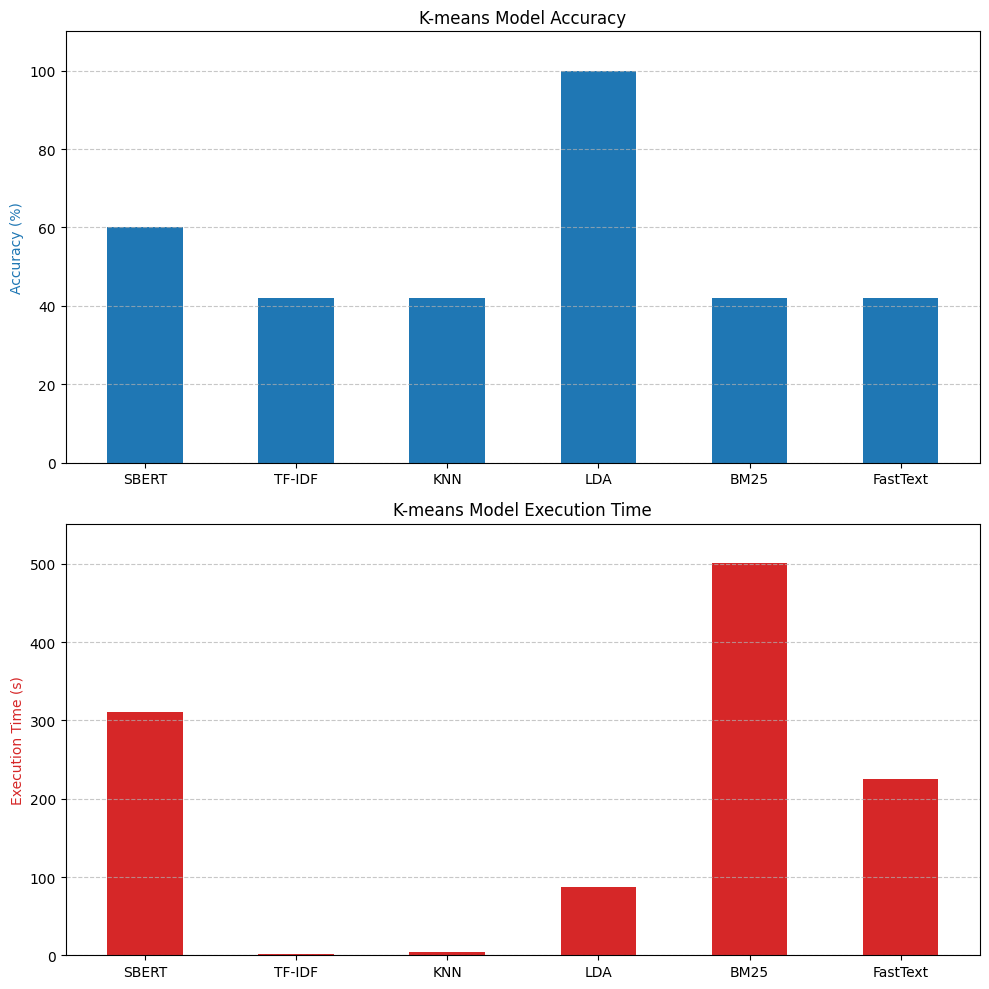

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Data for accuracy and execution time
models = ['SBERT', 'TF-IDF', 'KNN', 'LDA', 'BM25', 'FastText']
accuracy = [SBERT_cluster_Purity*100, TFIDF_cluster_Purity*100, KNN_cluster_Purity*100, 
            LDA_cluster_Purity*100, BM25_cluster_Purity*100, FastText_cluster_Purity*100]  # Accuracy in percentage
execution_time = [time_SBERT, time_TFIDF, time_KNN, time_LDA, time_BM25, time_fastText]  # Execution time in seconds

x = np.arange(len(models))  # the label locations
width = 0.5  # bar width

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))  # Two rows, one column

# First subplot: Accuracy
ax1.bar(x, accuracy, width, color='tab:blue')
ax1.set_ylabel('Accuracy (%)', color='tab:blue')
ax1.set_title('K-means Model Accuracy')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.set_ylim(0, 110)  # Set y-axis limit for accuracy
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Second subplot: Execution Time
ax2.bar(x, execution_time, width, color='tab:red')
ax2.set_ylabel('Execution Time (s)', color='tab:red')
ax2.set_title('K-means Model Execution Time')
ax2.set_xticks(x)
ax2.set_xticklabels(models)
ax2.set_ylim(0, max(execution_time) * 1.1)  # Set y-axis limit for execution time
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
